<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝 종류 - 사람의 감독 하에 훈련하는 것인지 아닌지 분류
* 지도 학습(Supervised Learning) : 레이블(타겟)이 있는 데이터를 학습.
    * 분류(classification) : 클래스들을 분류.
    * 회귀(regression) : 숫자 예측
* 비지도 학습(Unsupervised Learning) : 레이블(타겟)이 없는 데이터를 학습.
    * 군집(clustering)
    * 시각화(visualization)
    * 이상치(outlier) 탐지
* 준지도 학습(semi-supervised learning) : 비지도 학습 + 전문가 시스템
* 강화 학습(reinforcement learning) : 보상과 벌칙을 통해서 학습.

# 문제

fish 데이터셋에서 물고기의 무게를 예측.
* Perch(농어)의 무게(Weight)를 길이(Length) 특성만으로 예측.
    * Weight(관심 변수, 레이블 ,타겟) ~ Length(독립 변수, 특성)
    * KNN, Linear Regression
* Perch의 무게를 다른 4개의 특성들로 예측.
    * Weight ~ Length + Diagonal + Height + Width
    * Linear Regression

# Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor   # KNN을 이용한 숫자 예측 알고리즘.
from sklearn.linear_model import LinearRegression   # 선형 회귀를 이용한 숫자 예측 알고리즘.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # 회귀 평가 지표들.

# 데이터 준비

In [10]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [11]:
fish = pd.read_csv(file_path)

In [14]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [15]:
perch = fish[fish.Species == 'Perch']

In [18]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
* 특성(feature) : Length -> 2차원 배열
* 레이블(label), 타겟(target) : Weight -> 1차원 배열

In [39]:
# 특성 배열 - (samples, features) shape의 2차원 배열
X = perch[['Length']].values

In [40]:
X[:5]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [41]:
X.shape   #> 샘플 개수 : 56, 특성 개수 : 1개, 2차원 배열

(56, 1)

In [42]:
# 타겟 배열 - (samples, )   shape의 1차원 배열
y = perch['Weight'].values.copy()   # 원본을 변경하지 않은 상태로 남기려고.

In [43]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

In [44]:
y.shape  # 1차원 배열

(56,)

# train-test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
56 * 0.25

14.0

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 1), (14, 1), (42,), (14,))

In [56]:
# y(Weight) ~ X(Length) 산점도 시각화. 훈련 셋/ 테스트 셋 구분.

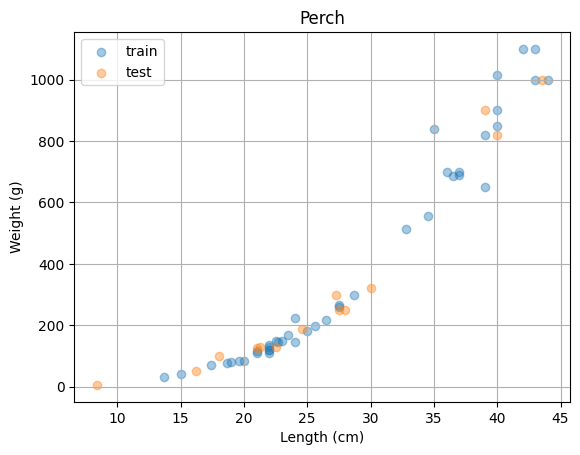

In [77]:
plt.scatter(x=X_train, y=y_train, label='train', alpha=0.4)
plt.scatter(x=X_test, y=y_test, label='test', alpha=0.4)

plt.title('Perch')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.legend()
plt.show()